In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [46]:
data = pd.read_csv('Tabelas/amostras_df.csv', parse_dates=['Data da Coleta'])
data.set_index('Data da Coleta', inplace=True)

In [47]:
data.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
Data da Coleta,,,,,,,
2012-01-02,NE,BA,CAETITE,DIESEL,2.080,Litro,IPIRANGA
2012-01-02,S,RS,CANOAS,ETANOL,2.299,Litro,IPIRANGA
2012-01-02,SE,MG,JUIZ DE FORA,ETANOL,2.299,Litro,PETROBRAS DISTRIBUIDORA S.A.
2012-01-02,S,RS,SAO LUIZ GONZAGA,GASOLINA,2.890,Litro,COSAN LUBRIFICANTES
2012-01-02,N,PA,PARAUAPEBAS,DIESEL,2.287,Litro,PETROBRAS DISTRIBUIDORA S.A.


In [48]:
target_column = 'Valor de Venda'

In [50]:
data['Dias'] = (data.index - data.index[0]).days

In [52]:
data

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,Dias
Data da Coleta,,,,,,,,
2012-01-02,NE,BA,CAETITE,DIESEL,2.080,Litro,IPIRANGA,0
2012-01-02,S,RS,CANOAS,ETANOL,2.299,Litro,IPIRANGA,0
2012-01-02,SE,MG,JUIZ DE FORA,ETANOL,2.299,Litro,PETROBRAS DISTRIBUIDORA S.A.,0
2012-01-02,S,RS,SAO LUIZ GONZAGA,GASOLINA,2.890,Litro,COSAN LUBRIFICANTES,0
2012-01-02,N,PA,PARAUAPEBAS,DIESEL,2.287,Litro,PETROBRAS DISTRIBUIDORA S.A.,0
...,...,...,...,...,...,...,...,...
2022-12-30,SE,SP,PIRACICABA,ETANOL,3.790,Litro,BRANCA,4015
2022-12-30,S,RS,PASSO FUNDO,GASOLINA,4.860,Litro,BRANCA,4015
2022-12-30,SE,SP,PIRACICABA,DIESEL,6.390,Litro,RAIZEN,4015


In [53]:
X = data['Dias'].values.reshape(-1, 1)
y = data[target_column].values

In [54]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [55]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f"Erro Médio Quadrático: {mse}")

Erro Médio Quadrático: 0.5422457311325491


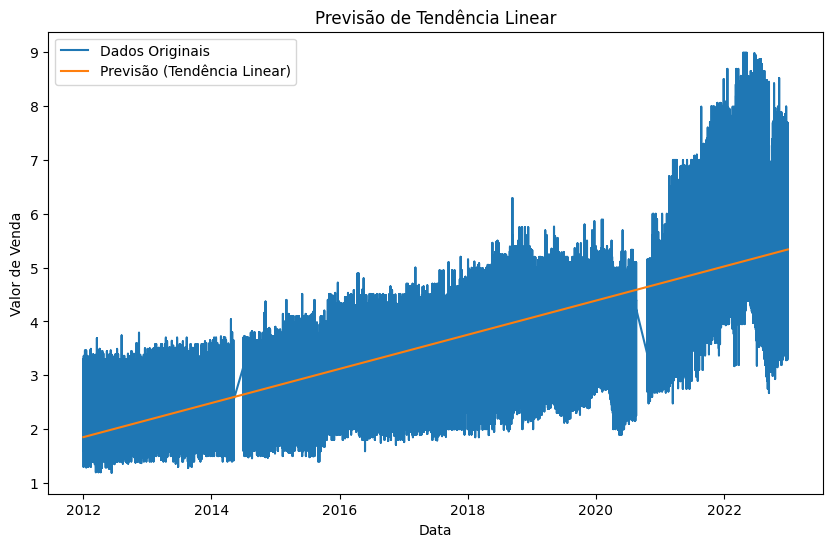

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(data.index, y_pred, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Previsão de Tendência Linear')
plt.legend()
plt.show()


In [58]:
dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
previsao_futura = model.predict(dias_futuros.reshape(-1, 1))

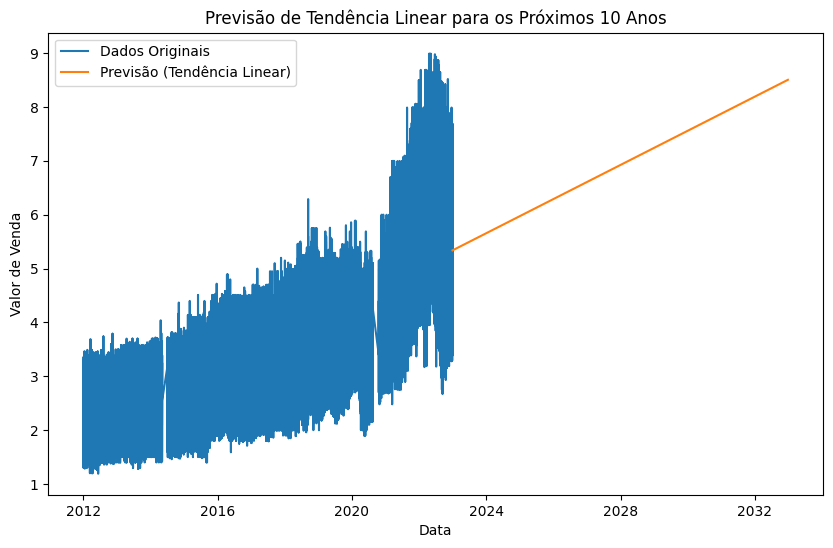

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura), freq='D'), previsao_futura, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Previsão de Tendência Linear para os Próximos 10 Anos')
plt.legend()
plt.show()

In [3]:
data.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto',
       'Valor de Venda', 'Unidade de Medida', 'Bandeira', 'Dias'],
      dtype='object')

In [61]:
grau_polinomio = 2 

In [62]:
poly_features = PolynomialFeatures(degree=grau_polinomio)
X_poly = poly_features.fit_transform(X)

In [63]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [64]:
dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
dias_futuros_poly = poly_features.transform(dias_futuros.reshape(-1, 1))
previsao_futura_poly = model_poly.predict(dias_futuros_poly)

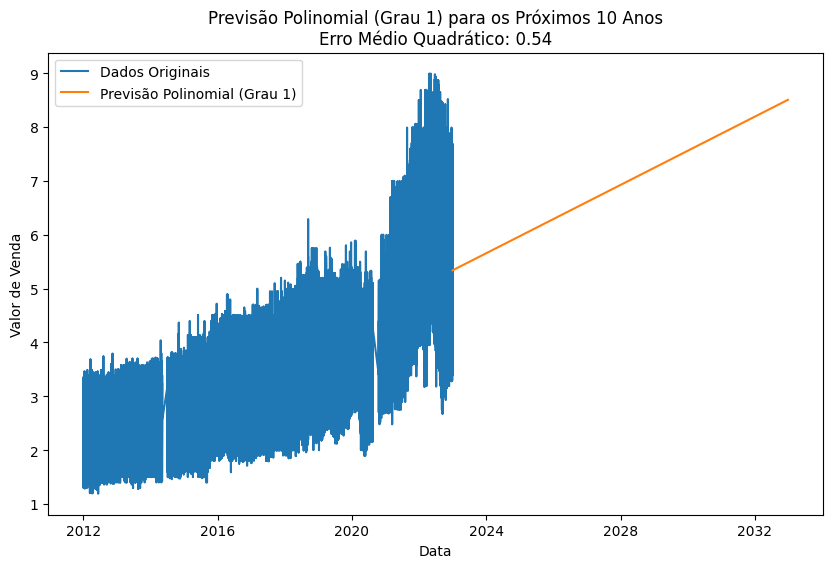

In [65]:
y_pred_poly = model_poly.predict(X_poly)
emq_poly = mean_squared_error(y, y_pred_poly)

plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura_poly), freq='D'), previsao_futura_poly, label=f'Previsão Polinomial (Grau {grau_polinomio})')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title(f'Previsão Polinomial (Grau {grau_polinomio}) para os Próximos 10 Anos\nErro Médio Quadrático: {emq_poly:.2f}')
plt.legend()
plt.show()
